In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Model
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import vgg16
from tensorflow.keras.models import load_model

In [17]:
img_rows, img_cols=224,224
pre_trained_model = vgg16.VGG16(weights='imagenet', include_top = False, input_shape = (img_rows, img_cols,3))

for layer in pre_trained_model.layers:
  layer.trainable = False

pre_trained_model.summary()

58892288/58889256 [==============================] - 1s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
______________________________________________________________

In [18]:
# Define a Callback class that stops training once accuracy reaches 98.0%
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.98):
      print("\nReached 98.0% accuracy so cancelling training!")
      self.model.stop_training = True

      

In [19]:
pre_trained_model_output = pre_trained_model.output
pre_trained_model_output

<KerasTensor: shape=(None, 7, 7, 512) dtype=float32 (created by layer 'block5_pool')>

In [20]:
from tensorflow.keras.optimizers import RMSprop

# Flatten the output layer to 1 dimension
x = layers.Flatten()(pre_trained_model_output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(x)
# Add a fully connected layer with 512 hidden units and ReLU activation
x = layers.Dense(512, activation='relu')(x)
# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)                  
# Add a final softmax layer for classification
x = layers.Dense(51,activation='softmax')(x)        

model = Model( pre_trained_model.input, x) 

model.compile(optimizer = RMSprop(lr=0.0001), 
              loss = 'categorical_crossentropy', 
              metrics = ['accuracy'])

model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [21]:
train_data_dir = '/content/gdrive/MyDrive/bangkit_capstone_model/224x224/train/'
validation_data_dir = '/content/gdrive/MyDrive/bangkit_capstone_model/224x224/test/'

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=20,
      horizontal_flip=True)
 
validation_datagen = ImageDataGenerator(rescale=1./255)
 
batch_size = 12
 
train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_rows, img_cols),
        batch_size=batch_size,
        class_mode='categorical')
 
validation_generator = validation_datagen.flow_from_directory(
        validation_data_dir,
        target_size=(img_rows, img_cols),
        batch_size=batch_size,
        class_mode='categorical')

Found 1031 images belonging to 51 classes.
Found 207 images belonging to 51 classes.


In [ ]:
nb_train_samples = 1031
nb_validation_samples = 207
batch_size = 16

callbacks = myCallback()
history = model.fit_generator(train_generator,
    steps_per_epoch = nb_train_samples // batch_size,
    epochs = 30,
    callbacks = callbacks,
    validation_data = validation_generator,
    validation_steps = nb_validation_samples // batch_size)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
64/64 [==============================] - 328s 5s/step - loss: 3.6640 - accuracy: 0.1252 - val_loss: 2.5779 - val_accuracy: 0.3958
Epoch 2/30
64/64 [==============================] - 279s 4s/step - loss: 2.3702 - accuracy: 0.4180 - val_loss: 1.8720 - val_accuracy: 0.4444
Epoch 3/30
64/64 [==============================] - 276s 4s/step - loss: 1.4337 - accuracy: 0.6519 - val_loss: 1.0538 - val_accuracy: 0.6875
Epoch 4/30
64/64 [==============================] - 278s 4s/step - loss: 0.8869 - accuracy: 0.7914 - val_loss: 0.5077 - val_accuracy: 0.8889
Epoch 5/30
64/64 [==============================] - 278s 4s/step - loss: 0.5781 - accuracy: 0.8709 - val_loss: 0.3683 - val_accuracy: 0.8958
Epoch 6/30
64/64 [==============================] - 278s 4s/step - loss: 0.3646 - accuracy: 0.9179 - val_loss: 0.2066 - val_accuracy: 0.9375
Epoch 7/30
64/64 [==============================] - 278s 4s/step - loss: 0.2981 - accuracy: 0.9296 - val_loss: 0.1606 - val_accuracy: 0.9514
Epoch 8/30
64

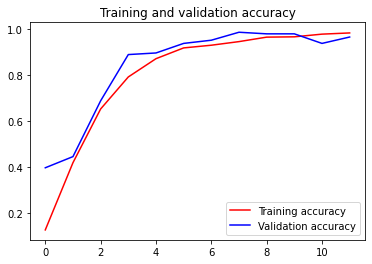

<Figure size 432x288 with 0 Axes>

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

In [ ]:
model.save("/content/gdrive/My Drive/bangkit_capstone_model/face_detection_drop_out_new.h5")

In [23]:
train_generator.class_indices

{'0000000000000001': 0,
 '0000000000000002': 1,
 '0000000000000003': 2,
 '0000000000000004': 3,
 '0000000000000005': 4,
 '0000000000000006': 5,
 '0000000000000007': 6,
 '0000000000000008': 7,
 '0000000000000009': 8,
 '0000000000000010': 9,
 '0000000000000011': 10,
 '0000000000000012': 11,
 '0000000000000013': 12,
 '0000000000000014': 13,
 '0000000000000015': 14,
 '0000000000000016': 15,
 '0000000000000017': 16,
 '0000000000000018': 17,
 '0000000000000019': 18,
 '0000000000000020': 19,
 '0000000000000021': 20,
 '0000000000000022': 21,
 '0000000000000023': 22,
 '0000000000000024': 23,
 '0000000000000025': 24,
 '0000000000000026': 25,
 '0000000000000027': 26,
 '0000000000000028': 27,
 '0000000000000029': 28,
 '0000000000000030': 29,
 '0000000000000031': 30,
 '0000000000000032': 31,
 '0000000000000033': 32,
 '0000000000000034': 33,
 '0000000000000035': 34,
 '0000000000000036': 35,
 '0000000000000037': 36,
 '0000000000000038': 37,
 '0000000000000039': 38,
 '0000000000000040': 39,
 '00000000

In [ ]:
validation_generator.class_indices

{'0000000000000001': 0,
 '0000000000000002': 1,
 '0000000000000003': 2,
 '0000000000000004': 3,
 '0000000000000005': 4,
 '0000000000000006': 5,
 '0000000000000007': 6,
 '0000000000000008': 7,
 '0000000000000009': 8,
 '0000000000000010': 9,
 '0000000000000011': 10,
 '0000000000000012': 11,
 '0000000000000013': 12,
 '0000000000000014': 13,
 '0000000000000015': 14,
 '0000000000000016': 15,
 '0000000000000017': 16,
 '0000000000000018': 17,
 '0000000000000019': 18,
 '0000000000000020': 19,
 '0000000000000021': 20,
 '0000000000000022': 21,
 '0000000000000023': 22,
 '0000000000000024': 23,
 '0000000000000025': 24,
 '0000000000000026': 25,
 '0000000000000027': 26,
 '0000000000000028': 27,
 '0000000000000029': 28,
 '0000000000000030': 29,
 '0000000000000031': 30,
 '0000000000000032': 31,
 '0000000000000033': 32,
 '0000000000000034': 33,
 '0000000000000035': 34,
 '0000000000000036': 35,
 '0000000000000037': 36,
 '0000000000000038': 37,
 '0000000000000039': 38,
 '0000000000000040': 39,
 '00000000

In [5]:
m= load_model('/content/gdrive/My Drive/bangkit_capstone_model/face_detection_drop_out_new.h5')

In [25]:
test = image.load_img('/content/gdrive/My Drive/bangkit_capstone_model/224x224/test_51.jpg',target_size=(224,224,3))

In [26]:
type(test)

PIL.JpegImagePlugin.JpegImageFile

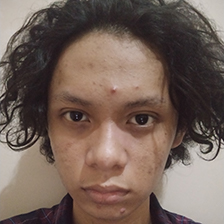

In [27]:
test

In [42]:
test= image.img_to_array(test)
test.shape

(224, 224, 3)

In [41]:
timg= np.expand_dims(test,axis=0)
timg.shape

(1, 224, 224, 3)

In [44]:
y_pred= m.predict(timg)
y_pred

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 1.]], dtype=float32)

In [34]:
result = np.argmax(y_pred,axis=1)

In [35]:
print(result)

[50]


In [36]:
labels = (validation_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in result]
nik = predictions[0]
nik

'0000000000000051'